In [1]:
# encoding=utf8

# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [2]:
columns = ['building_id','plan_configuration', 'ground_floor_type','land_surface_condition',
           'has_superstructure_mud_mortar_stone',
           'has_superstructure_cement_mortar_brick',
           'has_superstructure_rc_engineered',
           'has_superstructure_rc_non_engineered',
           'has_superstructure_timber',
           'has_superstructure_stone_flag',
           'has_superstructure_bamboo',
           'has_superstructure_cement_mortar_stone',
           'has_superstructure_adobe_mud',
           'damage_grade']
data_values = pd.read_csv('data/clean_Data.csv', usecols=columns)
data_values.head()
my_colors = ['lightblue','orange','crimson']

In [3]:
data_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 14 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   land_surface_condition                  260601 non-null  object
 2   ground_floor_type                       260601 non-null  object
 3   plan_configuration                      260601 non-null  object
 4   has_superstructure_adobe_mud            260601 non-null  bool  
 5   has_superstructure_mud_mortar_stone     260601 non-null  bool  
 6   has_superstructure_stone_flag           260601 non-null  bool  
 7   has_superstructure_cement_mortar_stone  260601 non-null  bool  
 8   has_superstructure_cement_mortar_brick  260601 non-null  bool  
 9   has_superstructure_timber               260601 non-null  bool  
 10  has_superstructure_bamboo               260601 non-null 

In [4]:
data_values["cantidad"] = 1
data_values

,building_id,land_surface_condition,ground_floor_type,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,damage_grade,cantidad
0,802906,t,f,d,True,True,False,False,False,False,False,False,False,3,1
1,28830,o,x,d,False,True,False,False,False,False,False,False,False,2,1
2,94947,t,f,d,False,True,False,False,False,False,False,False,False,3,1
3,590882,t,f,d,False,True,False,False,False,True,True,False,False,2,1
4,201944,t,f,d,True,False,False,False,False,False,False,False,False,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,n,f,q,False,True,False,False,False,False,False,False,False,2,1
260597,669485,t,f,d,False,True,False,False,False,False,False,False,False,3,1
260598,602512,t,f,d,False,True,False,False,False,False,False,False,False,3,1
260599,151409,t,v,d,False,False,False,False,True,False,False,False,False,2,1


In [5]:
#Tipo de daño segun condicion de superficie
dmg_grade_by_land_surf = data_values.groupby(["land_surface_condition", "damage_grade"]).agg({"cantidad" : "count"}).reset_index()
dmg_grade_by_land_surf

,land_surface_condition,damage_grade,cantidad
0,n,1,2556
1,n,2,21484
2,n,3,11488
3,o,1,602
4,o,2,4708
5,o,3,3006
6,t,1,21966
7,t,2,122067
8,t,3,72724


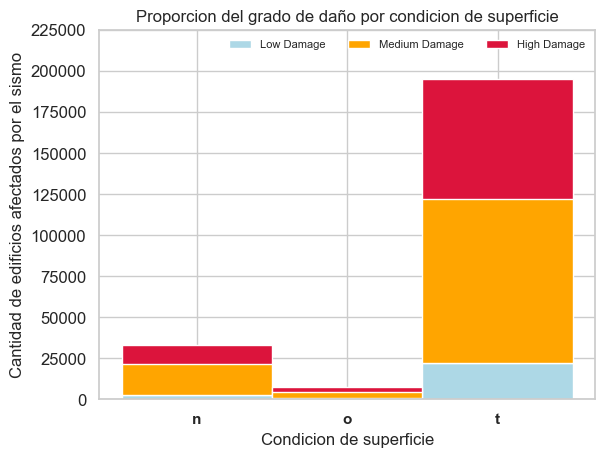

In [6]:
dmg_1 = list(dmg_grade_by_land_surf.loc[dmg_grade_by_land_surf["damage_grade"]==1,"cantidad"])
dmg_2 = list(dmg_grade_by_land_surf.loc[dmg_grade_by_land_surf["damage_grade"]==2,"cantidad"])
dmg_3 = list(dmg_grade_by_land_surf.loc[dmg_grade_by_land_surf["damage_grade"]==3,"cantidad"])

header = ["Low Damage","Medium Damage","High Damage"]

r = [0,1,2]
names = ['n', 'o', 't']
barWidth = 1

p1 = plt.bar(r, dmg_1, color=my_colors[0], edgecolor='white', width=barWidth, label = 'Low Damage')
p2 = plt.bar(r, dmg_2, bottom = dmg_1, color=my_colors[1], edgecolor='white', width=barWidth, label = 'Medium Damage')
p3 = plt.bar(r, dmg_3, bottom = dmg_2, color=my_colors[2], edgecolor='white', width=barWidth, label = 'High Damage')

plt.ylim([0,225000])
plt.xticks(r, names, fontweight='bold')
plt.yticks(fontsize=12)
plt.title("Proporcion del grado de daño por condicion de superficie",fontsize = 12)
plt.xlabel("Condicion de superficie")
plt.ylabel("Cantidad de edificios afectados por el sismo", fontsize=12)
plt.legend((p1[0], p2[0], p3[0]), (header[0], header[1], header[2]), fontsize=8, ncol=3, framealpha=0, fancybox=True)
plt.show()

In [7]:
buildingsByLandSurface = dmg_grade_by_land_surf.groupby(['land_surface_condition']).agg({'cantidad': 'sum'})
buildingsByLandSurface

,cantidad
land_surface_condition,
n,35528
o,8316
t,216757


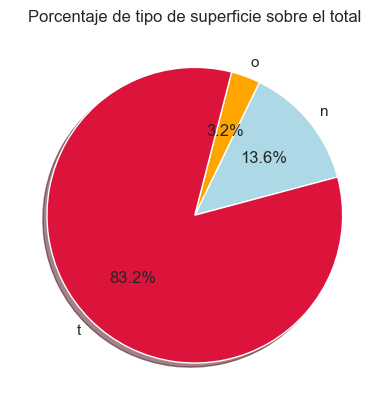

In [8]:
plt.pie(buildingsByLandSurface["cantidad"].to_list(),
        labels = ["n" ,"o","t"],
        autopct='%1.1f%%',
        startangle=15,           
        shadow = True,
        colors = my_colors
)
plt.title("Porcentaje de tipo de superficie sobre el total")
plt.show()

Text(0, 0.5, 'Tipo de daño')

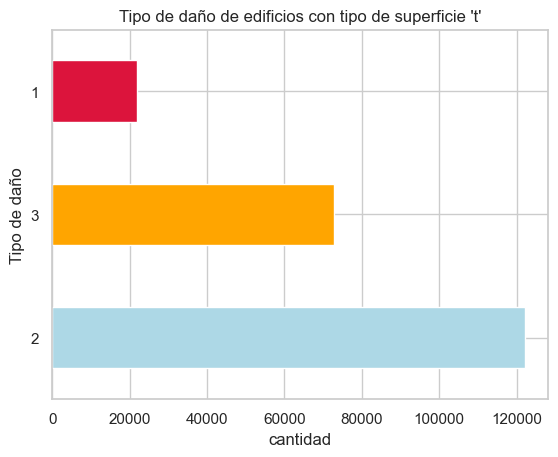

In [9]:
data_values.loc[data_values['land_surface_condition'] == "t",:].reset_index()['damage_grade'].value_counts()\
.plot(kind = "barh", color = my_colors)
plt.title("Tipo de daño de edificios con tipo de superficie 't'")
plt.xlabel("cantidad")
plt.ylabel("Tipo de daño")

Text(0, 0.5, 'Tipo de daño')

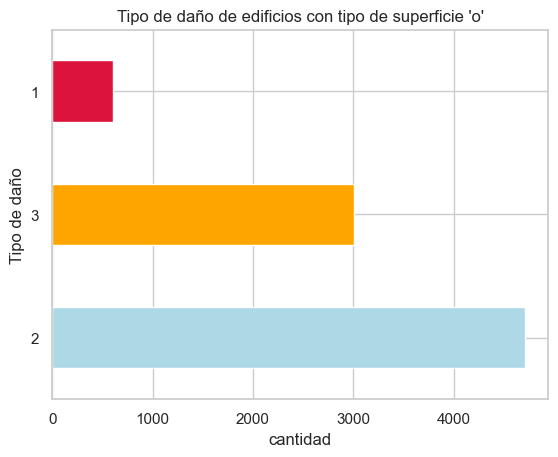

In [10]:
data_values.loc[data_values['land_surface_condition'] == "o",:].reset_index()['damage_grade'].value_counts()\
.plot(kind = "barh", color = my_colors)
plt.title("Tipo de daño de edificios con tipo de superficie 'o'")
plt.xlabel("cantidad")
plt.ylabel("Tipo de daño")

Text(0, 0.5, 'Tipo de daño')

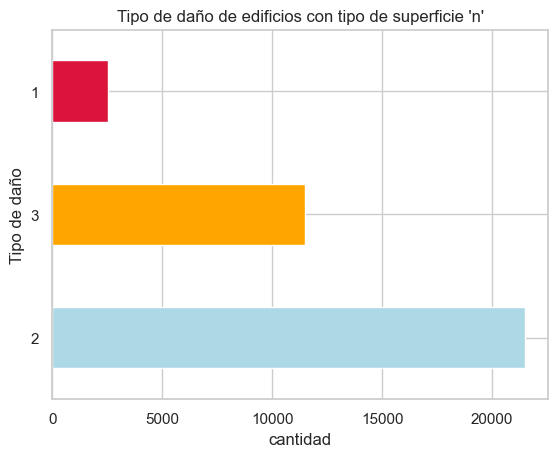

In [11]:
data_values.loc[data_values['land_surface_condition'] == "n",:].reset_index()['damage_grade'].value_counts()\
.plot(kind = "barh", color = my_colors)
plt.title("Tipo de daño de edificios con tipo de superficie 'n'")
plt.xlabel("cantidad")
plt.ylabel("Tipo de daño")

Text(0, 0.5, 'Cantidad de edificios')

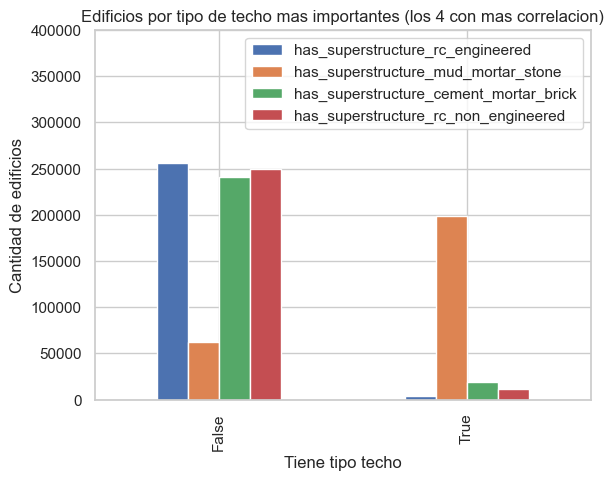

In [12]:
data_values.loc[:,{'has_superstructure_mud_mortar_stone',
            'has_superstructure_cement_mortar_brick',
            'has_superstructure_rc_non_engineered',
            'has_superstructure_rc_engineered'}].apply(pd.value_counts).plot(kind = 'bar')
plt.ylim([0,400000])
plt.title("Edificios por tipo de techo mas importantes (los 4 con mas correlacion)")
plt.xlabel("Tiene tipo techo")
plt.ylabel("Cantidad de edificios")

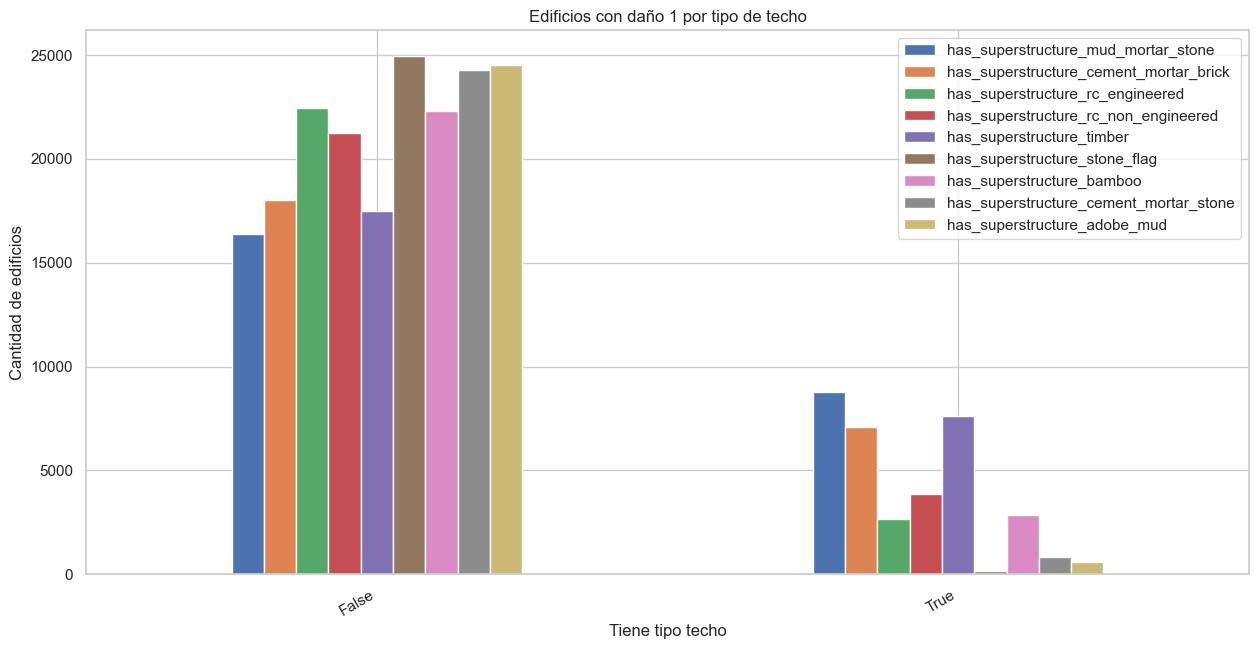

In [13]:
#que techo tenian los edificios que menos daño sufrieron
data_values.loc[data_values['damage_grade'] == 1, ['has_superstructure_mud_mortar_stone',
           'has_superstructure_cement_mortar_brick',
           'has_superstructure_rc_engineered',
           'has_superstructure_rc_non_engineered',
           'has_superstructure_timber',
           'has_superstructure_stone_flag',
           'has_superstructure_bamboo',
           'has_superstructure_cement_mortar_stone',
           'has_superstructure_adobe_mud']].apply(pd.value_counts).plot(kind = 'bar', figsize = (15, 8) )

plt.title("Edificios con daño 1 por tipo de techo")
plt.xlabel("Tiene tipo techo")
plt.ylabel("Cantidad de edificios")
plt.gcf().autofmt_xdate()

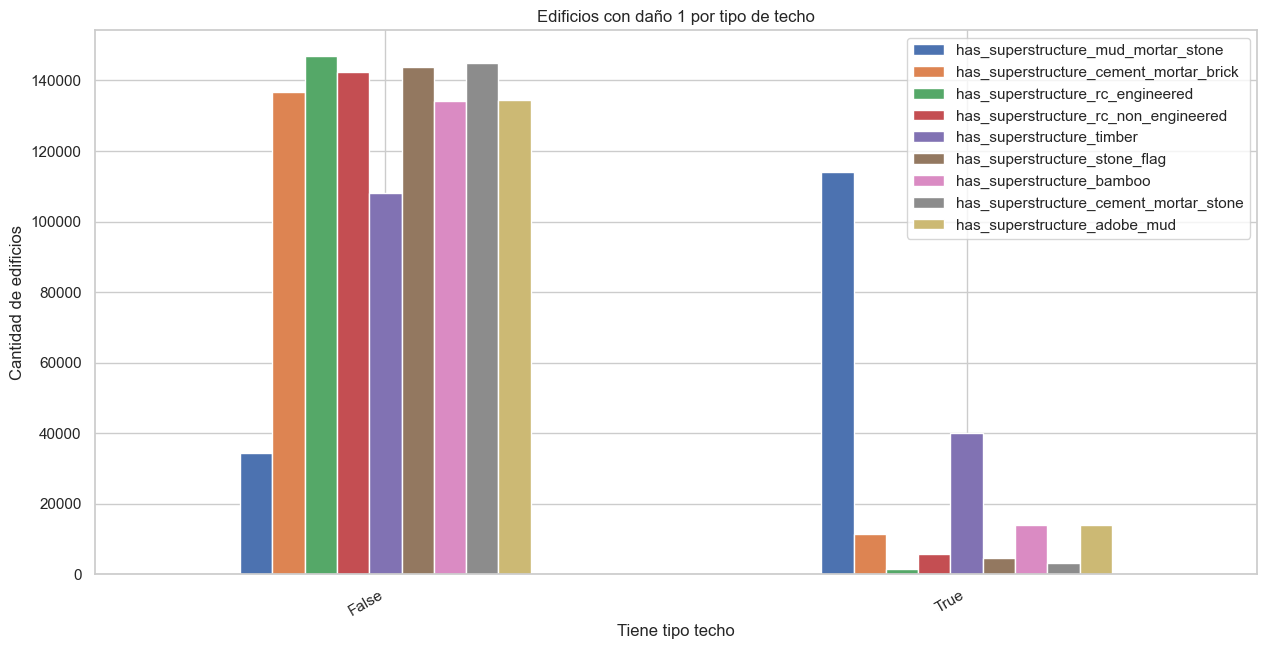

In [14]:
#que techo tenian los edificios que menos daño sufrieron
data_values.loc[data_values['damage_grade'] == 2, ['has_superstructure_mud_mortar_stone',
           'has_superstructure_cement_mortar_brick',
           'has_superstructure_rc_engineered',
           'has_superstructure_rc_non_engineered',
           'has_superstructure_timber',
           'has_superstructure_stone_flag',
           'has_superstructure_bamboo',
           'has_superstructure_cement_mortar_stone',
           'has_superstructure_adobe_mud']].apply(pd.value_counts).plot(kind = 'bar', figsize = (15, 8) )

plt.title("Edificios con daño 1 por tipo de techo")
plt.xlabel("Tiene tipo techo")
plt.ylabel("Cantidad de edificios")
plt.gcf().autofmt_xdate()

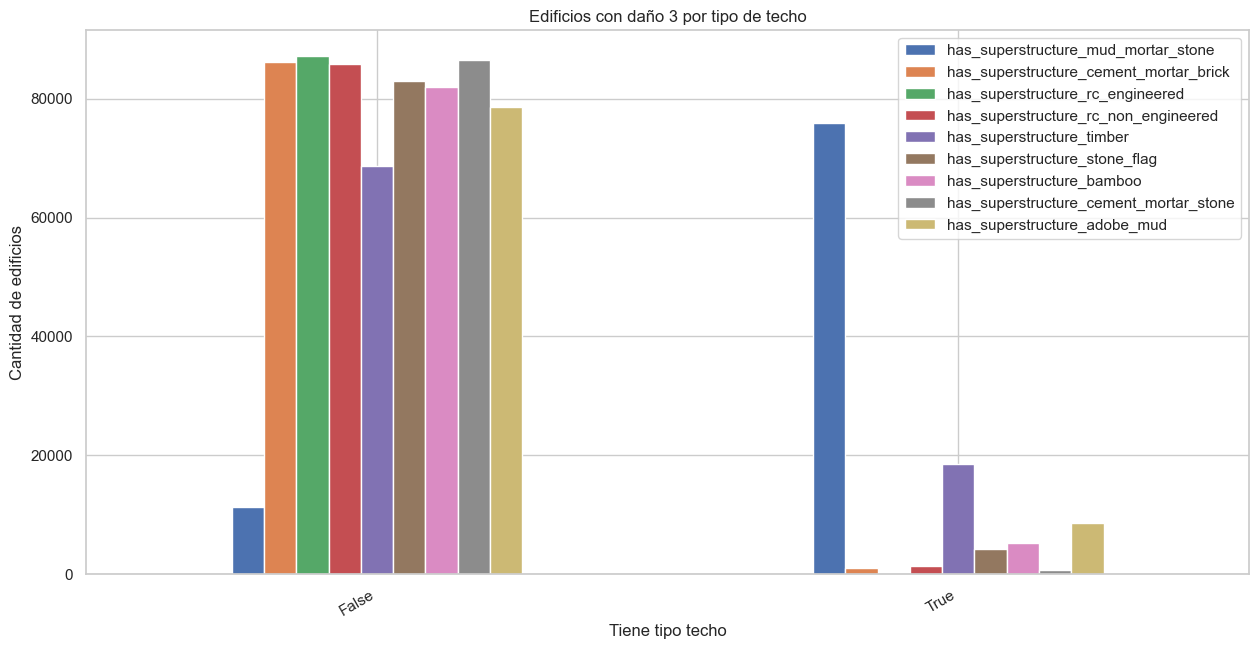

In [15]:
#que techo tenian los edificios que menos daño sufrieron
data_values.loc[data_values['damage_grade'] == 3, ['has_superstructure_mud_mortar_stone',
           'has_superstructure_cement_mortar_brick',
           'has_superstructure_rc_engineered',
           'has_superstructure_rc_non_engineered',
           'has_superstructure_timber',
           'has_superstructure_stone_flag',
           'has_superstructure_bamboo',
           'has_superstructure_cement_mortar_stone',
           'has_superstructure_adobe_mud']].apply(pd.value_counts).plot(kind = 'bar', figsize = (15, 8) )

plt.title("Edificios con daño 3 por tipo de techo")
plt.xlabel("Tiene tipo techo")
plt.ylabel("Cantidad de edificios")
plt.gcf().autofmt_xdate()

In [16]:
#que techo sufrio mas daño de tipo 3
data_values.loc[data_values['has_superstructure_mud_mortar_stone'] == True,:].reset_index()['damage_grade'].value_counts()

2    113947
3     75854
1      8760
Name: damage_grade, dtype: int64

Text(0, 0.5, 'Tipo de daño')

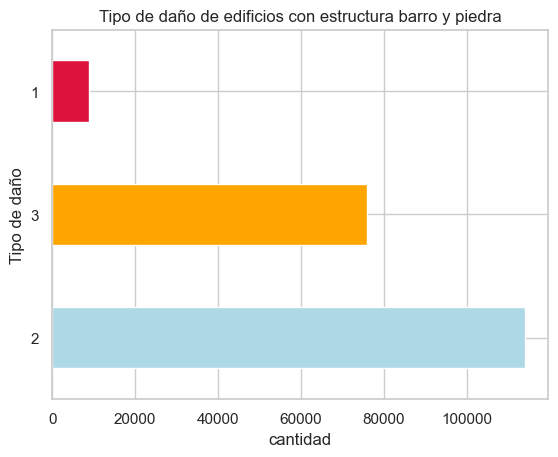

In [17]:
data_values.loc[data_values['has_superstructure_mud_mortar_stone'] == True,:].reset_index()['damage_grade'].value_counts()\
.plot(kind = "barh", color = my_colors)
plt.title("Tipo de daño de edificios con estructura barro y piedra")
plt.xlabel("cantidad")
plt.ylabel("Tipo de daño")

Text(0, 0.5, 'Tipo de daño')

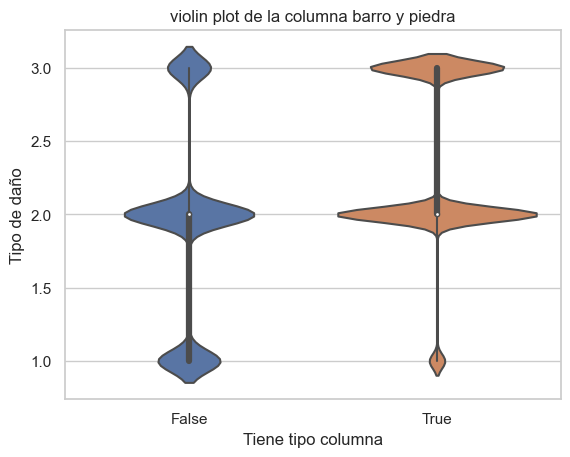

In [18]:
#analisis de la columna has_superstructure_mud_mortar_stone
sns.violinplot(x=data_values["has_superstructure_mud_mortar_stone"], y=data_values["damage_grade"])
plt.title("violin plot de la columna barro y piedra")
plt.xlabel("Tiene tipo columna")
plt.ylabel("Tipo de daño")

In [19]:
#Como no hay ningun edificio con plan de configuracion f y daño 1 agrego una fila con valor = 0
data_values.loc[data_values["plan_configuration"] == 'f'].loc[data_values["damage_grade"] == 1] 

,building_id,land_surface_condition,ground_floor_type,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,damage_grade,cantidad


In [20]:
#analizo el diseño sísmico
dmg_grade_by_config = data_values.groupby(["plan_configuration", "damage_grade"]).agg({"cantidad" : "count"}).reset_index()
dmg_grade_by_config

,plan_configuration,damage_grade,cantidad
0,a,1,66
1,a,2,157
2,a,3,29
3,c,1,86
4,c,2,206
5,c,3,33
6,d,1,23310
7,d,2,142523
8,d,3,84239
9,f,2,16


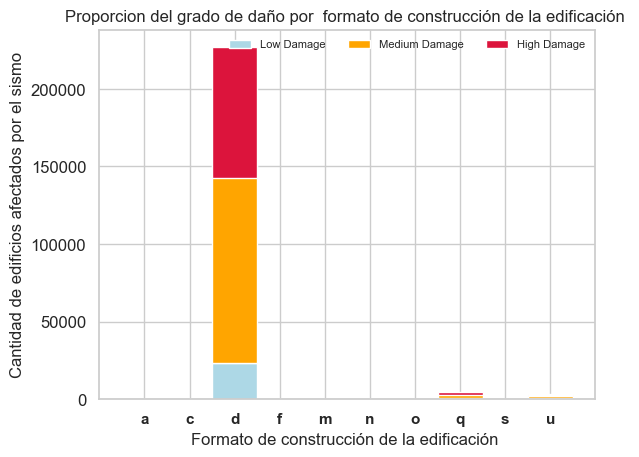

In [21]:
dmg_1 = list(dmg_grade_by_config.loc[dmg_grade_by_config["damage_grade"]==1,"cantidad"])
dmg_2 = list(dmg_grade_by_config.loc[dmg_grade_by_config["damage_grade"]==2,"cantidad"])
dmg_3 = list(dmg_grade_by_config.loc[dmg_grade_by_config["damage_grade"]==3,"cantidad"])

dmg_1.insert(3, 0)
dmg_1

my_colors = ['lightblue','orange','crimson']
header = ["Low Damage","Medium Damage","High Damage"]

r = [0,1,2,3,4,5,6,7,8,9]
names = ['a','c', 'd', 'f', 'm', 'n', 'o', 'q', 's', 'u']
barWidth = 1

p1 = plt.bar(r, dmg_1, color=my_colors[0], edgecolor='white', width=barWidth, label = 'Low Damage')
p2 = plt.bar(r, dmg_2, bottom = dmg_1, color=my_colors[1], edgecolor='white', width=barWidth, label = 'Medium Damage')
p3 = plt.bar(r, dmg_3, bottom = dmg_2, color=my_colors[2], edgecolor='white', width=barWidth, label = 'High Damage')


plt.xticks(r, names, fontweight='bold')
plt.yticks(fontsize=12)
plt.title("Proporcion del grado de daño por  formato de construcción de la edificación ",fontsize = 12)
plt.xlabel("Formato de construcción de la edificación ")
plt.ylabel("Cantidad de edificios afectados por el sismo", fontsize=12)
plt.legend((p1[0], p2[0], p3[0]), (header[0], header[1], header[2]), fontsize=8, ncol=3, framealpha=0, fancybox=True)
plt.show()

In [22]:
cantidadDeEdificiosPorConfiguracion = data_values.groupby(["plan_configuration"])["cantidad"].sum()
cantidadDeEdificiosPorConfiguracion

plan_configuration
a       252
c       325
d    250072
f        22
m        46
n        38
o       159
q      5692
s       346
u      3649
Name: cantidad, dtype: int64

Text(0.5, 1.0, 'Distribucion de formato de construccion ')

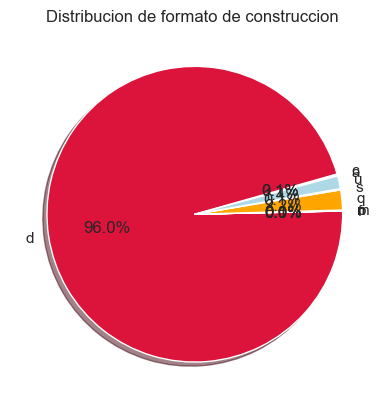

In [23]:
plt.pie(cantidadDeEdificiosPorConfiguracion,
        labels = ['a','c', 'd', 'f', 'm', 'n', 'o', 'q', 's', 'u'],
        autopct='%1.1f%%',
        startangle=15,           
        shadow = True,
        colors = my_colors
)
plt.title("Distribucion de formato de construccion ")

Text(0, 0.5, 'Tipo daño')

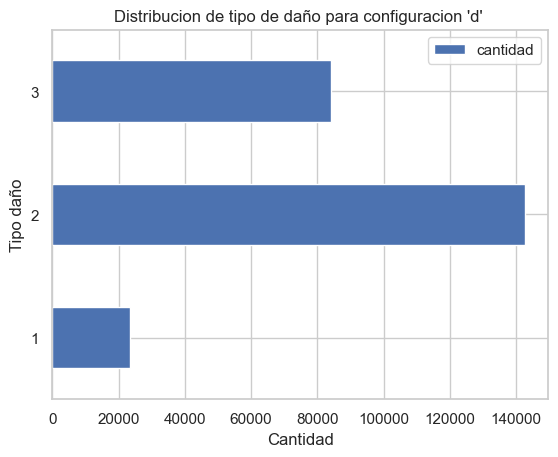

In [24]:
infoFormatoConstruccionD = data_values.loc[data_values["plan_configuration"] == 'd'].groupby(["damage_grade"]).agg({"cantidad": "count"})
infoFormatoConstruccionD.plot(kind = "barh")
plt.title("Distribucion de tipo de daño para configuracion 'd' ")
plt.xlabel("Cantidad")
plt.ylabel("Tipo daño")

In [25]:
data_values.loc[data_values["plan_configuration"] == 'q'].groupby("land_surface_condition").count()["cantidad"]

land_surface_condition
n     943
o     224
t    4525
Name: cantidad, dtype: int64

Text(0.5, 1.0, 'Distribucion del tipo de superficie para la configuracion D ')

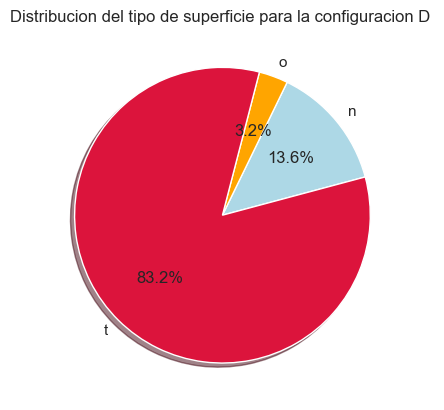

In [26]:
plt.pie(data_values.loc[data_values["plan_configuration"] == 'd'].groupby("land_surface_condition").count()["cantidad"].to_list(),
        labels = ["n" ,"o","t"],
        autopct='%1.1f%%',
        startangle=15,           
        shadow = True,
        colors = my_colors
)
plt.title("Distribucion del tipo de superficie para la configuracion D ")

In [27]:
cantidadDeEdificiosPorTipoPiso = data_values.groupby(["ground_floor_type"])["cantidad"].sum()
cantidadDeEdificiosPorTipoPiso

ground_floor_type
f    209619
m       508
v     24593
x     24877
z      1004
Name: cantidad, dtype: int64

Text(0.5, 1.0, 'Distribucion del tipo de piso ')

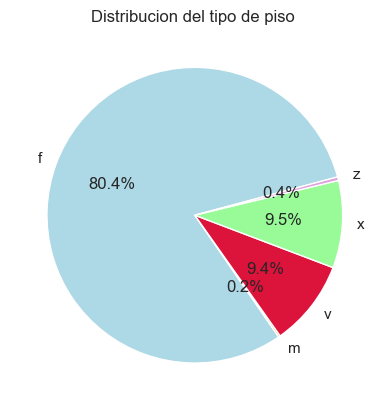

In [28]:
plt.pie(cantidadDeEdificiosPorTipoPiso,
        labels = ['f', 'm', 'v', 'x', 'z'],
        autopct='%1.1f%%',
        startangle=15,  
        colors = my_colors + ['palegreen', 'plum']
)
plt.title("Distribucion del tipo de piso ")

In [29]:
#por tipo de piso "ground_floor_type"
dmg_grade_by_floor_type = data_values.groupby(["ground_floor_type", "damage_grade"]).agg({"cantidad" : "count"}).reset_index()
dmg_grade_by_floor_type

,ground_floor_type,damage_grade,cantidad
0,f,1,12474
1,f,2,119877
2,f,3,77268
3,m,1,90
4,m,2,343
5,m,3,75
6,v,1,10309
7,v,2,12971
8,v,3,1313
9,x,1,2052


Text(0, 0.5, 'Tipo daño')

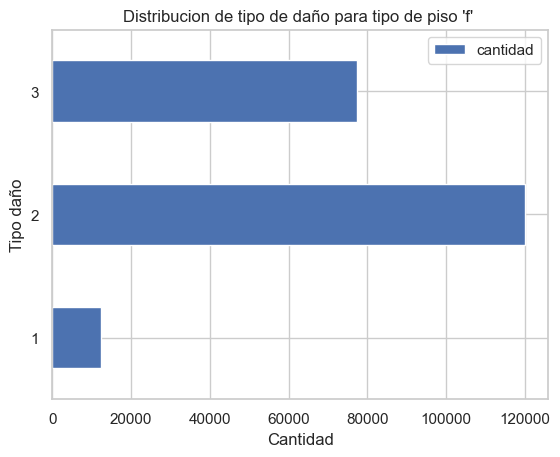

In [30]:
infoFormatoConstruccionD = data_values.loc[data_values["ground_floor_type"] == 'f'].groupby(["damage_grade"]).agg({"cantidad": "count"})
infoFormatoConstruccionD.plot(kind = "barh")
plt.title("Distribucion de tipo de daño para tipo de piso 'f' ")
plt.xlabel("Cantidad")
plt.ylabel("Tipo daño")

Text(0, 0.5, 'Cantidad de edificios')

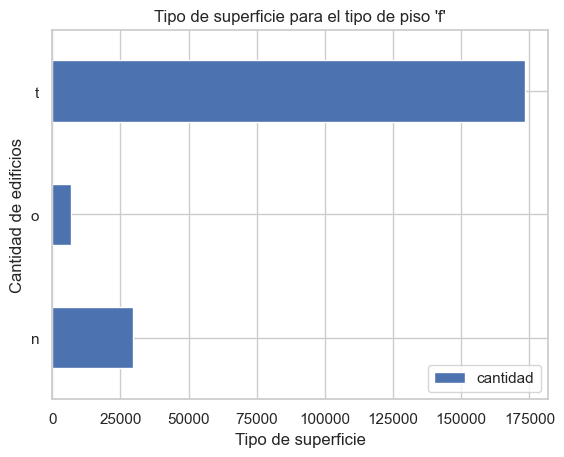

In [31]:
#analizamos columna f por tener la mayoria ampliamente
infoTipoPisoF = data_values.loc[data_values["ground_floor_type"] == 'f'].groupby(["land_surface_condition"]).agg({"cantidad": "count"})
infoTipoPisoF.plot(kind="barh")
plt.title("Tipo de superficie para el tipo de piso 'f'",fontsize = 12)
plt.xlabel("Tipo de superficie")
plt.ylabel("Cantidad de edificios", fontsize=12)

In [34]:
#analizamos columna f por tener la mayoria ampliamente
data_values.loc[data_values["ground_floor_type"] == 'f'].loc[data_values["plan_configuration"] == 'd'].loc[data_values["land_surface_condition"] == 't']


,building_id,land_surface_condition,ground_floor_type,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,damage_grade,cantidad
0,802906,t,f,d,True,True,False,False,False,False,False,False,False,3,1
2,94947,t,f,d,False,True,False,False,False,False,False,False,False,3,1
3,590882,t,f,d,False,True,False,False,False,True,True,False,False,2,1
4,201944,t,f,d,True,False,False,False,False,False,False,False,False,3,1
5,333020,t,f,d,False,True,False,False,False,False,False,False,False,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260593,226421,t,f,d,False,True,False,False,False,False,False,False,False,2,1
260594,159555,t,f,d,False,False,False,False,False,False,False,False,False,2,1
260595,827012,t,f,d,False,True,False,False,False,False,False,False,False,3,1
260597,669485,t,f,d,False,True,False,False,False,False,False,False,False,3,1
